<a id='intro'></a>
## Introduction

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.
- The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
- The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.


Question 1: What is the general trend for purchasing handgun, long gun, and others from 1998 to 2017 for each month?

Question 2: What is the prevalence of owned firms? and where is the highest percentage for each category of firms in 2012?

Question 3: Which are the states have highest and less median value of owner-occupied housing units from 2011 to 2015  compared to the population in percent?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load data
gunD = pd.read_excel('gun_data.xlsx')
CensusD = pd.read_csv('U.S. Census Data.csv')

In [3]:
# Show numbers of columns and rows in the data
gunD.shape, CensusD.shape

((12485, 27), (85, 52))

In [4]:
# Show first 5 rows in gun_data.xlsx and columns
gunD.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# Show last 5 rows in gun_data.xlsx and columns
gunD.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


### <font color='red'>**Note:**</font>
    - There are 12485 rows and 27 columns.
    - The data contains a column for the month, a column for the states, and the rest of the columns 
      for different numbers of guns and other things related to guns.
    - There are empty cells without any value.

In [6]:
# Show first 5 rows in U.S. Census Data.csv and columns
CensusD.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
# Show last 5 rows in U.S. Census Data.csv and columns
CensusD.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='red'>**Note:**</font>
    - The data for US census.
    - There is a (Fact) column with some ratings.
    - The column of (Fact Note) It does not contain useful data for my analysis.
    - The rest of the columns contains the every states and data of population and 
      categories in each state and value of housing.
    - The last rows contain only a description of the symbols used in the data, 
      which shows that there are many empty cells.

In [8]:
# Show data type and total input for each column in gun_data.xlsx
gunD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [9]:
# checking if there are any missing values in "gun_data.xlsx" file.
pd.isnull(gunD).sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

### <font color='red'>**Note:**</font>
- Data Type Of (month) is **object**
- There is a lot of missing data.

In [10]:
# Show data type and total input for each column in U.S. Census Data.csv
CensusD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [11]:
# checking if there are any missing values in "U.S. Census Data.csv" file.
pd.isnull(CensusD).sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

### <font color='red'>**Note:**</font>
- All Columns datatype are **object**
- There are missing values, most of them because of the last rows of symbol explanations.

#3

In [12]:
# describe the data
gunD.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [13]:
# describe the data
CensusD.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


#4

In [14]:
# checking for duplicates in gun_data.xlsx.
sum(gunD.duplicated())

0

In [15]:
# checking for duplicates in U.S. Census Data.csv.
sum(CensusD.duplicated())

3

### <font color='red'>**Note:**</font>
- Data of U.S. Census have (3) rows duplicates.

---

### Data Cleaning

> 1- Change datatype of "month" from objcet to datetime:

In [16]:
gunD['month'] = pd.to_datetime(gunD['month'])
gunD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

> 2- We will treat missing data by using average:

In [17]:
gunD.fillna(gunD.mean(numeric_only=True), inplace=True, axis=0)
pd.isnull(gunD).sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

> 3- We will change datatype for handgun, long_gun and other from float to intger.

In [18]:
gunD['handgun'] = gunD['handgun'].astype(int)
gunD['long_gun'] = gunD['long_gun'].astype(int)
gunD['other'] = gunD['other'].astype(int)

> 4- We will remove duplicates rows in U.S. Census Data:

In [19]:
CensusD.drop_duplicates(inplace=True)
CensusD.duplicated().sum()

0

> 5- We will drop "Fact Note" column in U.S. Census Data file , because it does not contain important data:

In [20]:
CensusD.drop('Fact Note', axis=1, inplace=True)
CensusD.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> 6- drop null rows

In [21]:
CensusD.dropna(axis=0,inplace=True)
CensusD

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


> 7- Delete some symbols in the data:

In [22]:
for x in CensusD.columns[1:]:
    CensusD[x] = CensusD[x].str.replace(',','')
    CensusD[x] = CensusD[x].str.replace('%','')
    CensusD[x] = CensusD[x].str.replace('"','')
    CensusD[x] = CensusD[x].str.replace('$','', regex=True)
    CensusD[x] = CensusD[x].str.replace(' ','')
CensusD.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,"Population, percent change - April 1, 2010 (es...",1.70,4.50,8.40,2.50,5.40,10.20,0.10,6.00,9.60,...,0.063,0.048,10.80,10.40,-0.20,5.10,8.40,-1.20,1.60,3.90
3,"Population, Census, April 1, 2010",4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00,7.30,6.30,6.40,6.30,6.10,5.20,5.80,5.50,...,0.071,0.061,7.20,8.30,4.90,6.10,6.20,5.50,5.80,6.50


8- in this step i will transportation the data frame.

In [23]:
# set column for new index
CensusD.set_index('Fact', inplace=True)
CensusD = CensusD.T.reset_index()


In [24]:
# i rename the column from index to State
CensusD.rename(columns = {'index':'State'}, inplace = True)

> 9- We will change datatype for owned firms and Median value of owner-occupied housing from object to intger.

    - In my analysis I will deal with such data.

In [25]:
CensusD['Men-owned firms, 2012'] = CensusD['Men-owned firms, 2012'].astype(int)
CensusD['Women-owned firms, 2012'] = CensusD['Women-owned firms, 2012'].astype(int)
CensusD['Minority-owned firms, 2012'] = CensusD['Minority-owned firms, 2012'].astype(int)
CensusD['Nonminority-owned firms, 2012'] = CensusD['Nonminority-owned firms, 2012'].astype(int)
CensusD['Veteran-owned firms, 2012'] = CensusD['Veteran-owned firms, 2012'].astype(int)
CensusD['Nonveteran-owned firms, 2012'] = CensusD['Nonveteran-owned firms, 2012'].astype(int)
CensusD['Median value of owner-occupied housing units, 2011-2015'] = CensusD['Median value of owner-occupied housing units, 2011-2015'].astype(int)
CensusD['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'] = CensusD['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'].astype(float)

---
<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:
### What is the general trend for purchasing handgun, long gun, and others from 1998 to 2017 for each month?

In [26]:
# First we will collect the number of guns by their types and use "groupby" for every month.
gun_pur = gunD[['month', 'handgun', 'long_gun', 'other']].groupby('month').sum()
gun_pur

,handgun,long_gun,other
month,,,
1998-11-01,6859,11909,19800
1998-12-01,219080,578692,19800
1999-01-01,190436,317725,19800
1999-02-01,238388,360221,19800
1999-03-01,246976,384585,19800
...,...,...,...
2017-05-01,552018,328157,29372
2017-06-01,569149,331152,29730
2017-07-01,480124,322264,26898


<function matplotlib.pyplot.show(close=None, block=None)>

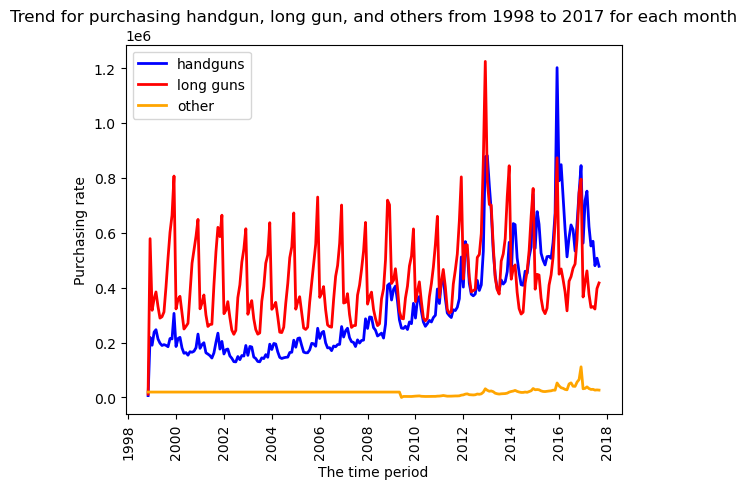

In [27]:
# now we will use visualization to see the general trend for purchasing handgun, long gun, and others from 1998 to 2017 for each month
plt.plot(gun_pur['handgun'], color='blue',linewidth=2, label='handguns')
plt.plot(gun_pur['long_gun'], color='red',linewidth=2, label='long guns')
plt.plot(gun_pur['other'], color='orange',linewidth=2, label='other')
plt.xticks(rotation = 90)
plt.xlabel('The time period')
plt.ylabel('Purchasing rate')
plt.title('Trend for purchasing handgun, long gun, and others from 1998 to 2017 for each month')
plt.legend()
plt.show

In [28]:
hgun = gun_pur['handgun'].sum()
lgun = gun_pur['long_gun'].sum()
oth = gun_pur['other'].sum()
print('Total of handgun =', hgun)
print('Total of long_gun =', lgun)
print('Total of other =', oth)

Total of handgun = 74171883
Total of long_gun = 97518416
Total of other = 4497194


> As we have seen, the general trend for purchasing rifles from 1998 to 2017 is increasing in most periods, especially long guns, as the total long guns reached 97,518,416, and he total number of handgun was 74,171,883 for the same period, while the other guns were the lowest with 4,497,194.

---
### Research Question 2:
### What is the prevalence of owned firms? and where is the highest percentage for each category of firms in 2012?

In [29]:
own_firms = CensusD[['State','Men-owned firms, 2012', 
              'Women-owned firms, 2012', 
              'Minority-owned firms, 2012',
              'Nonminority-owned firms, 2012',
              'Veteran-owned firms, 2012',
              'Nonveteran-owned firms, 2012'
              ]]
own_firms.head()

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
0,Alabama,203604,137630,92219,272651,41943,316984
1,Alaska,35402,22141,13688,51147,7953,56091
2,Arizona,245243,182425,135313,344981,46780,427582
3,Arkansas,123158,75962,35982,189029,25915,192988
4,California,1852580,1320085,1619857,1819107,252377,3176341


In [30]:
firms_sum = own_firms.sum(numeric_only=True)
firms_sum

Fact
Men-owned firms, 2012            14881148
Women-owned firms, 2012           9858884
Minority-owned firms, 2012        7927656
Nonminority-owned firms, 2012    19031837
Veteran-owned firms, 2012         2525136
Nonveteran-owned firms, 2012     24085409
dtype: int64

Text(0.5, 1.0, 'Owned Firms in 2012')

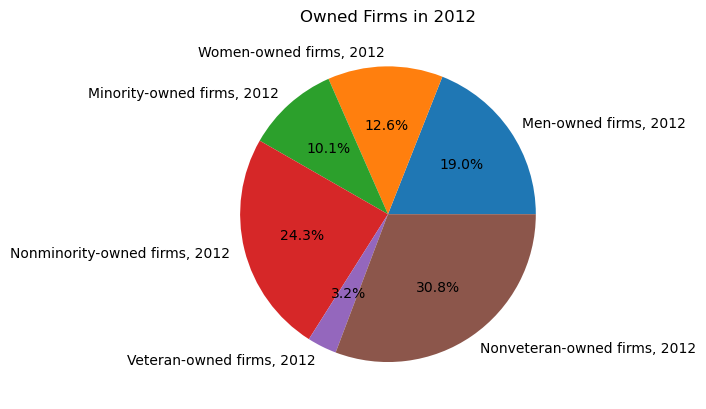

In [31]:
#
plt.pie(firms_sum, labels=own_firms.columns.values[1:], autopct='%1.1f%%');
plt.title("Owned Firms in 2012")


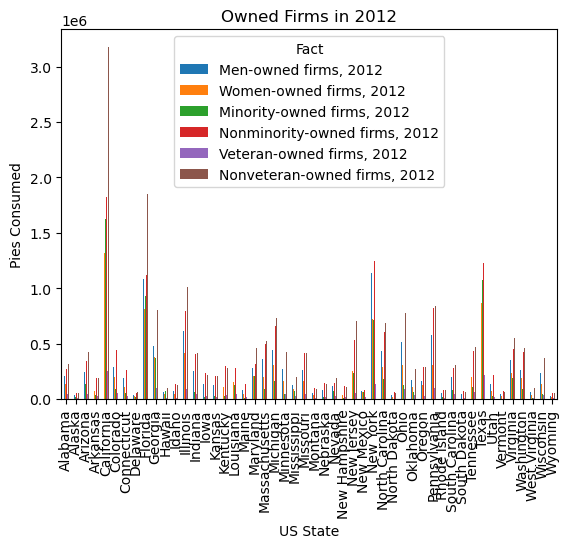

In [32]:
#
own_firms.reset_index().plot(
    x='State', 
    y=['Men-owned firms, 2012', 
       'Women-owned firms, 2012', 
       'Minority-owned firms, 2012',
       'Nonminority-owned firms, 2012',
       'Veteran-owned firms, 2012',
       'Nonveteran-owned firms, 2012'
       ], kind="bar"
)
plt.title("Owned Firms in 2012")
plt.xlabel("US State")
plt.ylabel("Pies Consumed")
plt.rcParams['figure.figsize']=(22,15)
plt.show()

In [33]:
# Top firms owned by men
own_firms[CensusD['Men-owned firms, 2012'] == own_firms['Men-owned firms, 2012'].max()]

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
4,California,1852580,1320085,1619857,1819107,252377,3176341


In [34]:
# Top firms owned by women
own_firms[CensusD['Women-owned firms, 2012'] == own_firms['Women-owned firms, 2012'].max()]

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
4,California,1852580,1320085,1619857,1819107,252377,3176341


In [35]:
# Top firms owned by minority
own_firms[CensusD['Minority-owned firms, 2012'] == own_firms['Minority-owned firms, 2012'].max()]

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
4,California,1852580,1320085,1619857,1819107,252377,3176341


In [36]:
# Top firms owned by nonminority
own_firms[CensusD['Nonminority-owned firms, 2012'] == own_firms['Nonminority-owned firms, 2012'].max()]

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
4,California,1852580,1320085,1619857,1819107,252377,3176341


In [37]:
# Top firms owned by veteran
own_firms[CensusD['Veteran-owned firms, 2012'] == own_firms['Veteran-owned firms, 2012'].max()]

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
4,California,1852580,1320085,1619857,1819107,252377,3176341


In [38]:
# Top firms owned by nonveteran
own_firms[CensusD['Nonveteran-owned firms, 2012'] == own_firms['Nonveteran-owned firms, 2012'].max()]

Fact,State,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
4,California,1852580,1320085,1619857,1819107,252377,3176341


> We can see from the perception that non-veteran firms are the most prevalent among all categories at 30.8% , with the state of California dominating the highest figures in all categories.

### Research Question 3:
### Which are the states have highest and less median value of owner-occupied housing units from 2011 to 2015  compared to the population in percent?

In [39]:
housD = CensusD[['State', 'Median value of owner-occupied housing units, 2011-2015']]
housD.head()

Fact,State,"Median value of owner-occupied housing units, 2011-2015"
0,Alabama,125500
1,Alaska,250000
2,Arizona,167500
3,Arkansas,111400
4,California,385500


In [40]:
# 
housD2 = CensusD[['State', 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']]
housD2.head()

Fact,State,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)"
0,Alabama,1.7
1,Alaska,4.5
2,Arizona,8.4
3,Arkansas,2.5
4,California,5.4


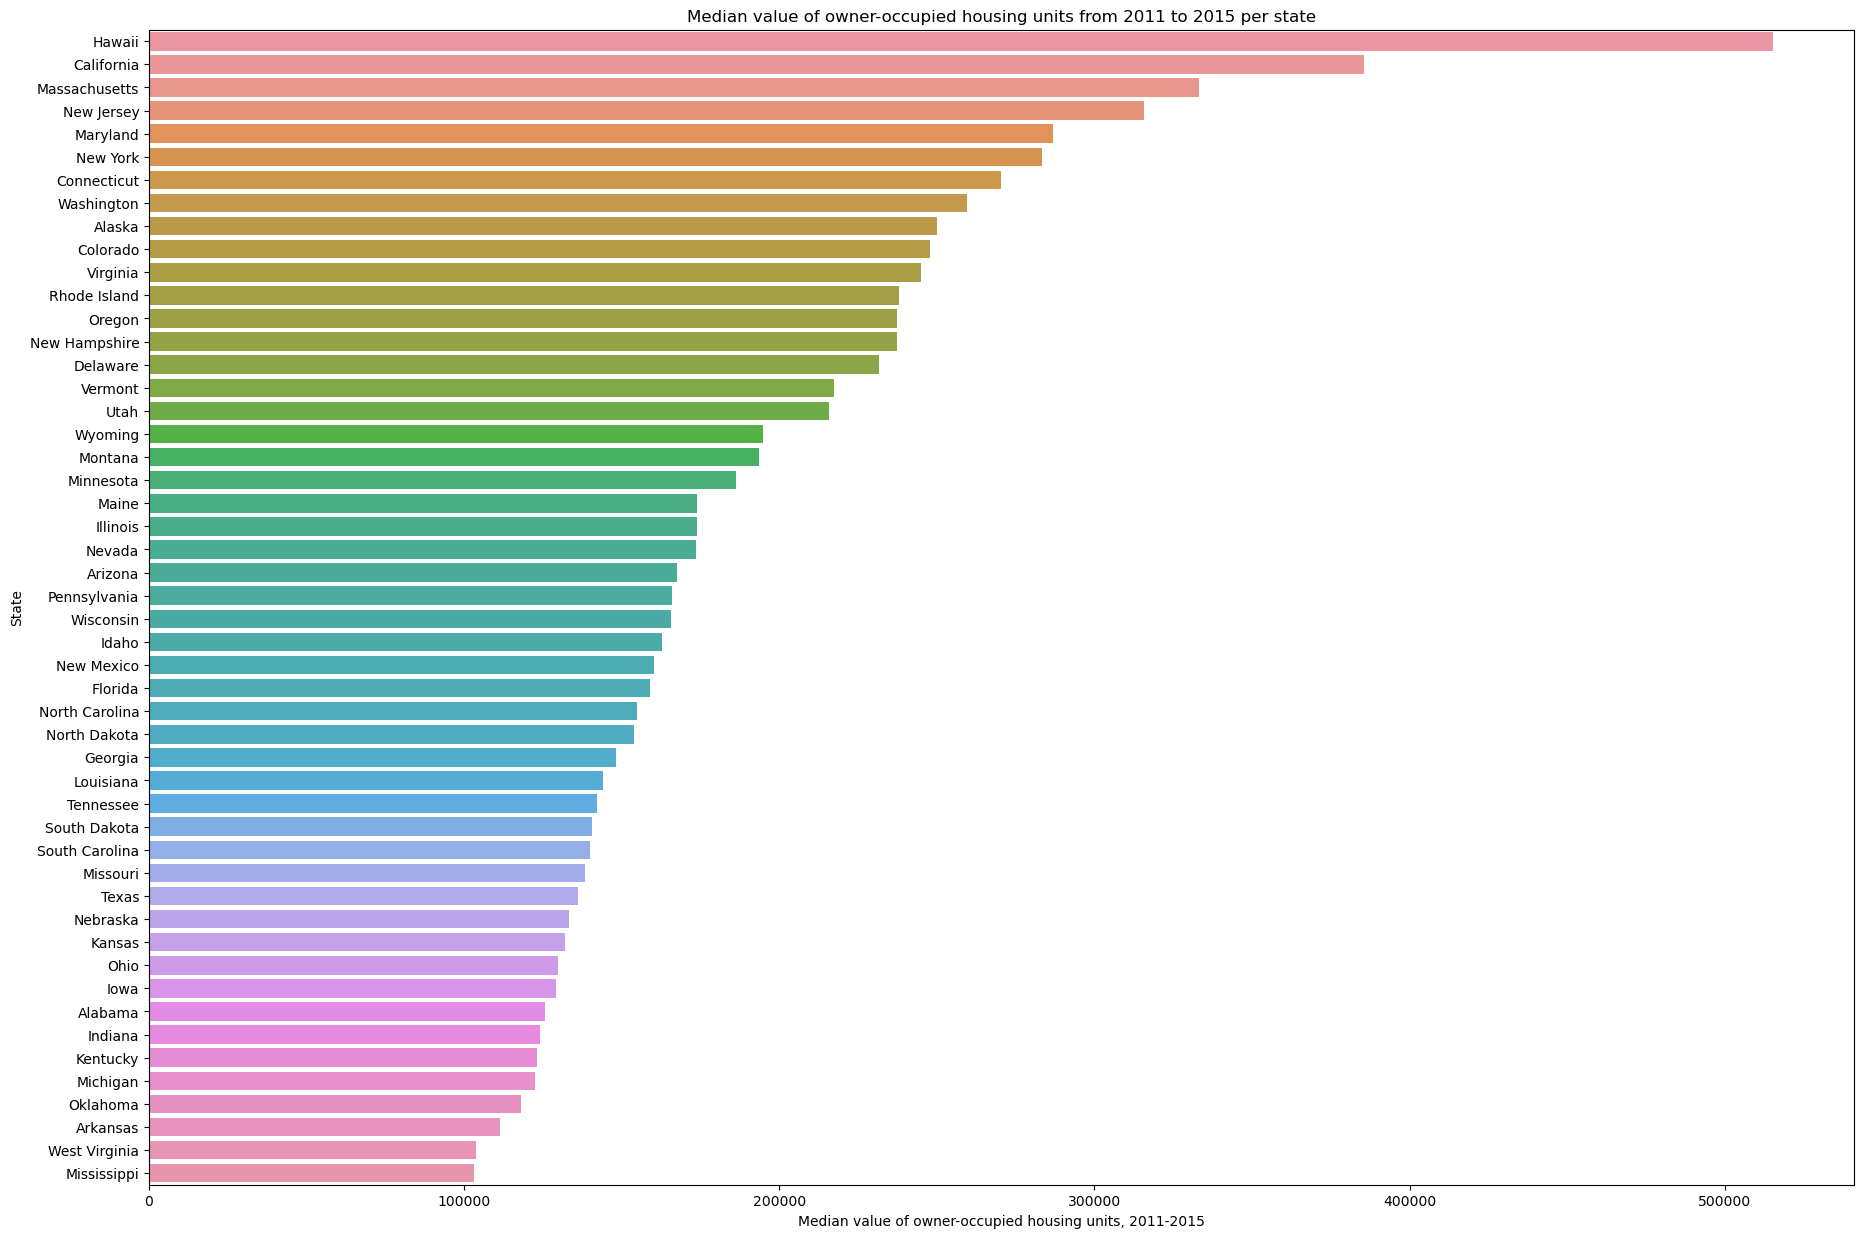

In [41]:
sns.barplot(data=housD, y='State', x='Median value of owner-occupied housing units, 2011-2015', 
    order=housD.sort_values('Median value of owner-occupied housing units, 2011-2015', ascending=False).State
    );
plt.title('Median value of owner-occupied housing units from 2011 to 2015 per state')
plt.show()

In [42]:
CensusD[CensusD['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'] 
== 
CensusD['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'].max()]

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
42,Texas,27862596,25146100,10.8,25145561,7.20,7.70,26.20,27.30,12.00,...,2356748,1251696,866678,1070392,1224845,213590,2057218,96.3,261231.71,48


In [43]:
CensusD[CensusD['State'] == 'Hawaii']

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
10,Hawaii,1428557,1360301,5.0,1360301,6.40,6.40,21.60,22.30,17.10,...,118454,60409,44453,74208,38510,11148,101334,211.8,6422.63,15


In [44]:
CensusD['Median value of owner-occupied housing units, 2011-2015'].max(), CensusD['Median value of owner-occupied housing units, 2011-2015'].min()

(515300, 103100)

> From the previous visualization, we can see that the state of Hawaii recorded the highest average value of occupied dwellings during the period from 2011 to 2015, reaching $515,300, while the state of Mississippi recorded the lowest average, with $103,100.

---
<a id='conclusions'></a>
## Conclusions

> Through this analysis, we have gained insight into the general concept. By examining the data, we have been able to track gun acquisition patterns for several years. Our examination yielded significant results for the months with the highest amounts of gun purchases. Where we can conclude that recent years have witnessed a significant rise in the trend of buying guns of all kinds, which helps the FBI to benefit from data more than a criminal background check.
>
> We were also able to determine the spread of owned companies of several types in the United States for the year 2012, which provides an overview of the market and investment opportunities in each state, and we also analyzed the median value of owner-occupied housing units during the period from 2011 to 2015, which also gives an overview and benefit in real estate investment in each state.


## limitation 

> One of the main limitations is the limited data of the census of owned firms as the attached census is for 2012 only. It is worth noting that such data is subject to change on an annual basis and helps more for the desired purpose.
>
> As for NICS data, the presence of a lot of missing data, which we replaced with the average to create a close value, from my own point of view, the missing values of such sensitive data create uncertainty in the trends of owning guns, where more accurate data gives more clarity to the places of their spread of various kinds.

### References: 

1. Gun Data: https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx
2. U.S. census data: https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv
3. https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe
4. https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/